In [1]:
import cv2
import numpy as np
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 575ms/step


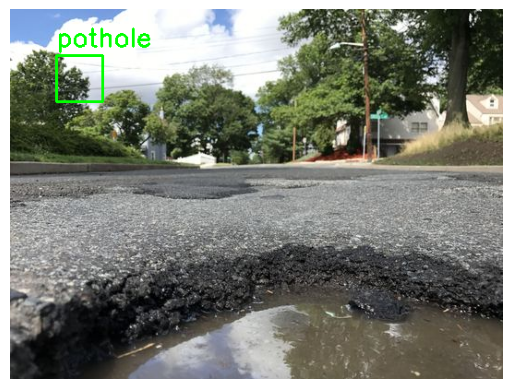

In [10]:
# Load the trained model
model = load_model("model.h5")

# Load the test image
img_path = "pothole_image_data/test/pothole/20.jpg"
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0  # Normalize the image

# Predict the class
predictions = model.predict(img_array)
predicted_class = np.argmax(predictions[0])

# Define class labels
class_labels = ["pothole"]

# Load the original image for drawing bounding boxes
orig_img = cv2.imread(img_path)

# Assuming you have predefined bounding boxes; for demonstration, I'll define a dummy box
# In a real scenario, you would use an object detection model to get these coordinates
bounding_boxes = [
    {"label": class_labels[predicted_class], "box": (50, 50, 50, 50)}  # Example box
]

# Draw the bounding boxes and labels on the image
for box in bounding_boxes:
    label = box["label"]
    (x, y, w, h) = box["box"]
    cv2.rectangle(orig_img, (x, y), (x + w, y + h), (0, 255, 0), 2)
    cv2.putText(orig_img, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), 2)

# Display the image
plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()

